### Look at some example units, see if their firing correlates to feature value

In [93]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
import utils.io_utils as io_utils
from constants.glm_constants import *
from constants.behavioral_constants import *
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
PRE_INTERVAL = 500
POST_INTERVAL = 500
INTERVAL_SIZE = 50
SMOOTH = 1
EVENT = "FixationOnCross"

In [96]:
pseudo_unit_id = 2018100208
feature = "CYAN"

In [97]:
sessions = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(sessions)
unit_row = positions[positions.PseudoUnitID == pseudo_unit_id].iloc[0]

In [98]:
session = unit_row.session

behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
beh = pd.read_csv(behavior_path)

# filter trials 
valid_beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(valid_beh)
valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber", how="inner")
beh = behavioral_utils.get_feature_values_per_session(session, valid_beh)
beh = behavioral_utils.get_prev_choice_fbs(beh)

# # condition on prev choice, fb. 
# feature_dim = FEATURE_TO_DIM[feature]
# beh = beh[beh["PrevResponse"] == "Correct"]
# beh = beh[beh[f"Prev{feature_dim}"] == feature]

In [99]:
fr_path = f"/data/patrick_res/firing_rates/{session}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"
# fr_path = f"/data/patrick_res/firing_rates/{session}_residual_feature_Response_with_interaction_prev_trial_params_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"

frs = pd.read_pickle(fr_path)
frs = frs[frs.UnitID == unit_row.UnitID]
frs = frs[(frs.TimeBins > 0.6) & (frs.TimeBins < 0.9)]
agg = frs.groupby(["UnitID", "TrialNumber"]).mean().reset_index()

In [100]:
merged = pd.merge(beh, agg, on="TrialNumber")

-0.03999677046021093
-0.05237529061525126


Text(0.5, 0, 'Trial Number')

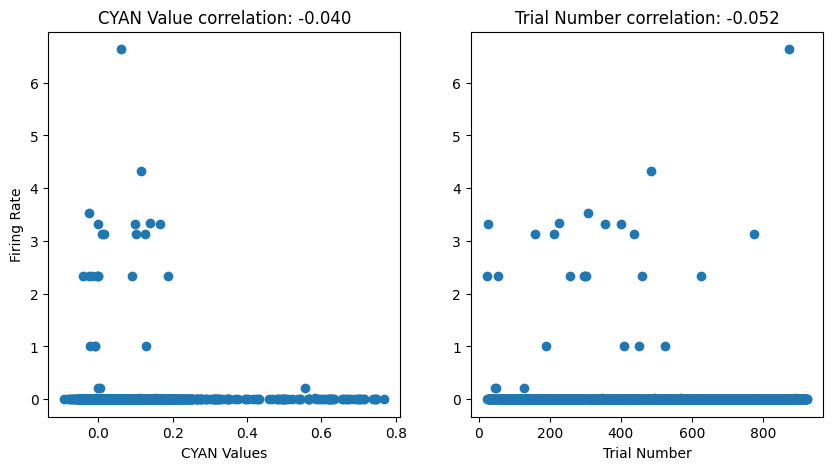

In [101]:
coef = np.corrcoef(merged.FiringRate, merged[feature + "Value"])[0, 1]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
print(coef)
ax = axs[0]
ax.scatter(merged[feature + "Value"], merged.FiringRate)
ax.set_ylabel("Firing Rate")
ax.set_xlabel(f"{feature} Values")
ax.set_title(f"{feature} Value correlation: {coef:.3f}")

ax = axs[1]
coef = np.corrcoef(merged.FiringRate, merged.TrialNumber)[0, 1]
print(coef)
ax.scatter(merged.TrialNumber, merged.FiringRate)
ax.set_title(f"Trial Number correlation: {coef:.3f}")
ax.set_xlabel(f"Trial Number")


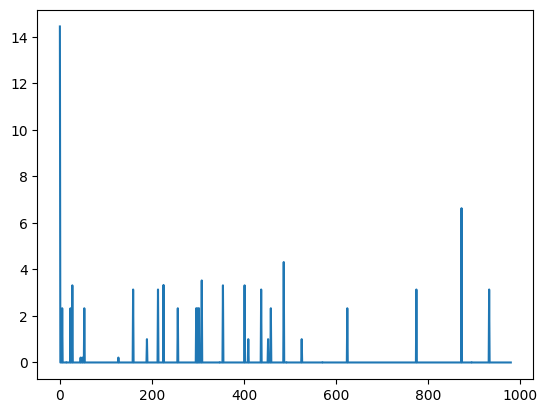

In [102]:
plt.plot(agg.TrialNumber, agg.FiringRate)

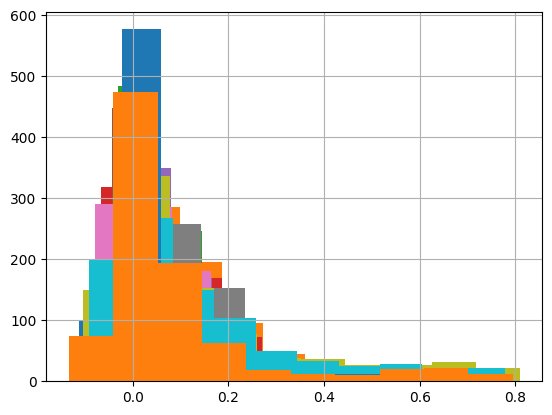

In [81]:
for feature in FEATURES:
    # print(f"{feature}: {beh[f'{feature}Value'].median()}")
    beh[f'{feature}Value'].hist()


### Ask: how many trials per condition (card/fb combo) do I really have? 

In [196]:
beh, frs = io_utils.load_rpe_sess_beh_and_frs(session)

In [197]:
beh

,BlockNumber,TrialAfterRuleChange,TaskInterrupt,ConditionNumber,Response,ItemChosen,TrialType,CurrentRule,LastRule,ShiftType,...,RPE_FD,RPE_FRL,RPEGroup,ColorRPEGroup,ColorResponse,ShapeRPEGroup,ShapeResponse,PatternRPEGroup,PatternResponse,Card
TrialNumber,,,,,,,,,,,,,,,,,,,,,
82,2,0,NaN,2882,Incorrect,1.0,5,MAGENTA,CYAN,Intradim.,...,-0.250000,-0.250000,more neg,CYAN_more neg,CYAN_Incorrect,SQUARE_more neg,SQUARE_Incorrect,SWIRL_more neg,SWIRL_Incorrect,CYAN_SQUARE_SWIRL
83,2,1,NaN,3080,Incorrect,1.0,5,MAGENTA,CYAN,Intradim.,...,-0.250000,-0.250000,more neg,CYAN_more neg,CYAN_Incorrect,STAR_more neg,STAR_Incorrect,SWIRL_more neg,SWIRL_Incorrect,CYAN_STAR_SWIRL
84,2,2,NaN,3281,Incorrect,1.0,5,MAGENTA,CYAN,Intradim.,...,-0.250000,-0.250000,more neg,CYAN_more neg,CYAN_Incorrect,SQUARE_more neg,SQUARE_Incorrect,POLKADOT_more neg,POLKADOT_Incorrect,CYAN_SQUARE_POLKADOT
85,2,3,NaN,2934,Incorrect,3.0,5,MAGENTA,CYAN,Intradim.,...,-0.250000,-0.250000,more neg,GREEN_more neg,GREEN_Incorrect,CIRCLE_more neg,CIRCLE_Incorrect,SWIRL_more neg,SWIRL_Incorrect,GREEN_CIRCLE_SWIRL
86,2,4,NaN,3050,Incorrect,1.0,5,MAGENTA,CYAN,Intradim.,...,-0.250000,-0.250000,more neg,CYAN_more neg,CYAN_Incorrect,TRIANGLE_more neg,TRIANGLE_Incorrect,SWIRL_more neg,SWIRL_Incorrect,CYAN_TRIANGLE_SWIRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,15,18,NaN,797,Correct,0.0,8,CIRCLE,SWIRL,Extradim.,...,0.245693,0.207474,less pos,MAGENTA_less pos,MAGENTA_Correct,CIRCLE_less pos,CIRCLE_Correct,ESCHER_less pos,ESCHER_Correct,MAGENTA_CIRCLE_ESCHER
673,15,19,NaN,634,Correct,0.0,8,CIRCLE,SWIRL,Extradim.,...,0.248758,0.295811,more pos,CYAN_more pos,CYAN_Correct,CIRCLE_more pos,CIRCLE_Correct,RIPPLE_more pos,RIPPLE_Correct,CYAN_CIRCLE_RIPPLE
674,15,20,NaN,653,Correct,0.0,8,CIRCLE,SWIRL,Extradim.,...,0.134563,0.206049,less pos,CYAN_less pos,CYAN_Correct,CIRCLE_less pos,CIRCLE_Correct,ESCHER_less pos,ESCHER_Correct,CYAN_CIRCLE_ESCHER
